## Importing Libraries and Data

In [320]:
#import software libraries for data analysis
import pandas as pd
import numpy as np

#import software libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import software libraries for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

#access to drive files
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#import train data
train = pd.read_csv("/content/drive/My Drive/personal/cs/data/titanic_train.csv")
test = pd.read_csv("/content/drive/My Drive/personal/cs/data/titanic_test.csv")

#making an array of both datasets
combined = [test, train]

Mounted at /content/drive


## Previewing the Data

In [321]:
#data features
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [322]:
#train data preview (first ten)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [323]:
#train data preview (last ten)
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [324]:
#test data preview (first ten)
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


##Analyzing the Features

###Dropping Features

Before analyzing each of the features, we must determine which features can be dropped.

Just a quick look at the data shows that the PassengerId feature should be thrown out (because all its values are all unique and random so there would be no correlation with survival).



####String Features

Below is a table showing unique values for  features with String values.

In [325]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rice, Master. Arthur",male,347082,B96 B98,S
freq,1,577,7,4,644


The Ticket feature is a random set of numbers, so it  would not influence survival.

The Cabin feature has many missing values. There are 204 values but 891 passengers (only 147 unique which accounts for the duplicates). The preview also confirms this observation. As a result, this feature would not have a strong correlation to survival.

The Embarked feature only has three unique values, so it can be potentially be used as a feature for modeling. It also has two missing values which will need to be fixed later.

So, these three features are dropped: PassengerId (from above), Ticket, and Cabin.

In [326]:
#PassengerId, Ticket, and Cabin are not needed anymore
train = train.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1)
test = test.drop(['PassengerId','Ticket', 'Cabin'], axis=1)

#reestablishing the combined array of both datasets 
combined = [train,test]

#data check
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [327]:
#checking if there are any differences for the test data
test.describe(include=['O'])

,Name,Sex,Embarked
count,418,418,418
unique,418,2,3
top,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,S
freq,1,266,270


The Sex feature only has two unique values, so it can be potentially be used as a feature for modeling (correlation to Survived will be proven later).

The Name feature is completely unique (like PassengerId), but we could analyze passengers' titles (e.g. Ms) later which might correlate to survival.

####Numerical Features

For numerical features (in addition to PassengerId and Survived), there is Pclass, Age, SibSp, Parch, Fare.

In [328]:
#checking for missing values
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The Age feature is missing values (which will be fixed later), and it will most likely be classified into bands to improve correlation. 

The SibSp and Parch features might be combined into a single feature (either FamilySize which is the number of people in a passenger's family or IsAlone which determines whether the passenger is alone or not) to improve correlation.

Pclass likely has direct correlation (but this will be analyzed later).

Fare likely has direct correlation too (but this will be analyzed later) and will most likely be classified into bands to improve correlation (the preview shows that there are many different levels of fares)

In [329]:
#checking if test data is the same
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


The test data is missing Age values (like the training data) and is also missing values for the Fare (which will be fixed later).

### Name Feature

As stated above, a potential way a passenger's name might influence their survival is if they have a certain title (specific names are too unique to have a high correlation). To do this, we must first check if only some passengers have titles or if everyone has a title.

In [330]:
#extracts the titles
for dataset in combined:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#determines whether everyone has a title
train['Title'].describe()

count     891
unique     17
top        Mr
freq      517
Name: Title, dtype: object

As shown above, everyone has a title (891 passengers in the training set and 891 passengers with titles).

Next, we must check for titles by collecting a list of all the passenger titles.

In [331]:
#lists out unique titles
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

After seeing a list of all the titles, a type of "hierarchy" should be developed for the names. For example, someone with the titles Capt or Countess would be of higher status than someone with the titles Mr or Mrs (which could influence thier survival).

Thus, titles will be grouped as follows:
*   Special - Master, Don, Rev, Dr, Mme, Major, Lady, Sir, Mlle, Col, Capt, Countess, Jonkheer
*   NotSpecial - Mr, Mrs, Miss, Ms

They will be converted to numerical values: 0 for Special and 1 for NotSpecial.

In [332]:
#replace Name with Title
for dataset in combined:
  dataset.loc[dataset['Title'] == 'Mr', 'Name'] = 1
  dataset.loc[dataset['Title'] == 'Mrs', 'Name'] = 1
  dataset.loc[dataset['Title'] == 'Miss', 'Name'] = 1
  dataset.loc[dataset['Title'] == 'Ms', 'Name'] = 1
  dataset.loc[dataset['Name'] != 1, 'Name'] = 0

#correlation check
train[['Name', 'Survived']].groupby(['Name'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Name,Survived
0,0,0.515152
1,1,0.373333


The correlation checks out, so we can continue with the replacement of individual names with either 0 or 1 (depending on how special the passenger's title is).

In [333]:
#Title feature is not needed anymore
train = train.drop('Title', axis = 1)
test = test.drop('Title', axis = 1)

#reestablishing the combined array of both datasets
combined = [train, test]

#data check
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,1,3,1,female,26.0,0,0,7.9250,S
3,1,1,1,female,35.0,1,0,53.1000,S
4,0,3,1,male,35.0,0,0,8.0500,S


###Passenger Class Feature

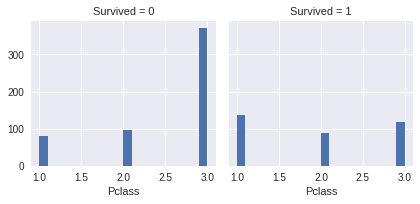

In [334]:
#data visualization of passenger classes
sns.FacetGrid(train, col='Survived').map(plt.hist, 'Pclass', bins=20)

In [335]:
#correlation check for passenger classes
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


The histograms and correlation chart above show that the majority of the first class passengers survived, about half of the second class passengers survived, and a small part of the third class passengers survived.

Because the feature is already numerical, its values do not need to be converted.

###Sex Feature

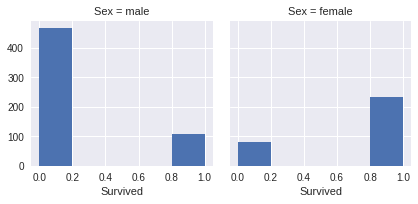

In [336]:
#data visualization of passenger sexes
sns.FacetGrid(train, col='Sex').map(plt.hist, 'Survived', bins=5)

In [337]:
#correlation check
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


The histograms and correlation chart above show that more females survived than didn't survive and that more than 2/3 of survivors were female even though most of the passengers were male.

Also, the Sex feature must be converted to numerical values to be used for the modeling.

In [338]:
#convert Sex feature to numerical
for dataset in combined:
  dataset.loc[dataset['Sex'] == 'male', 'Sex'] = 0
  dataset.loc[dataset['Sex'] == 'female', 'Sex'] = 1

#data check
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0,22.0,1,0,7.2500,S
1,1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,1,26.0,0,0,7.9250,S
3,1,1,1,1,35.0,1,0,53.1000,S
4,0,3,1,0,35.0,0,0,8.0500,S


### Family Features

As mentioned before, a new feature can be created from SibSp and Parch. The feature could be either FamilySize or IsAlone.


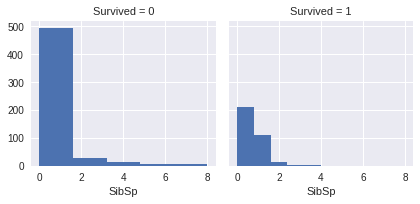

In [339]:
#data visualization of passenger siblings/spouses and correlation check
sns.FacetGrid(train, col='Survived').map(plt.hist, 'SibSp', bins=5)

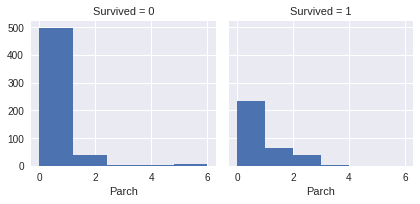

In [340]:
#data visualization of passenger parents/children and correlation check
sns.FacetGrid(train, col='Survived').map(plt.hist, 'Parch', bins=5)

The SibSp and Parch features produced similar results (in the histograms shown above), so a combination of the two could replace them. There are two options for this new feature: IsAlone or FamilySize.

In [341]:
#FamilySize
for dataset in combined:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,FamilySize,Survived
7,8,0.000000
8,11,0.000000
5,6,0.136364
4,5,0.200000
0,1,0.303538
6,7,0.333333
1,2,0.552795
2,3,0.578431
3,4,0.724138


In [342]:
#IsAlone
for dataset in combined:
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
1,1.0,0.505650
0,0.0,0.303538


The IsAlone feature has a stronger correlation to Survived (as Family Size increases, Survived doesn't necessarily increase) so it is favored. As a result, the FamilySize, SibSp, and Parch features are dropped.

In [343]:
#the other three features are dropped
train = train.drop(['FamilySize', 'SibSp', 'Parch'], axis=1)
test = test.drop(['FamilySize', 'SibSp', 'Parch'], axis=1)

#reestablishing the combined array of both datasets
combined = [train, test]

#data check
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,0,3,1,0,22.0,7.2500,S,1.0
1,1,1,1,1,38.0,71.2833,C,1.0
2,1,3,1,1,26.0,7.9250,S,0.0
3,1,1,1,1,35.0,53.1000,S,1.0
4,0,3,1,0,35.0,8.0500,S,0.0


###Fare Feature

To begin analysis of the fare feature, we must first fill missing values (just one missing in the testing data). We can easily do this by just replacing the null value with the most frequent fare. We could find the median value of the fares of passengers with the same other features, but only one value is missing so it is a little unnecessary.

In [0]:
#filling in the missing value
test['Fare'] = test['Fare'].fillna(test.Fare.dropna().mode()[0])

We must next determine the different levels of fares.

In [345]:
train['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

As shown above, there were many different levels of fares. Thus, a banding approach (like the one used for Age) has the potential to work.

To do this, we must first calculate the minimum and maximum fares.

In [346]:
#find min of fare
min = train['Fare'].min()
min

0.0

In [347]:
#find max of fare
max = train['Fare'].max()
max

512.3292

The range of fares goes from 0 to 512.33.

The banding is split into seven bands. This amount is selected to maintain a relatively low uniqueness (also no bands with the same correlation as others) but also allowing for heightened correlation.

In [348]:
#replace Fare with the bands
i = ((max-min)/7)+1
for dataset in combined: 
    dataset.loc[dataset['Fare'] <= i, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > i) & (dataset['Fare'] <= (2*i)), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > (2*i)) & (dataset['Fare'] <= (3*i)), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > (3*i)) & (dataset['Fare'] <= (4*i)), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > (4*i)) & (dataset['Fare'] <= (5*i)), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > (5*i)) & (dataset['Fare'] <= (6*i)), 'Fare'] = 5
    dataset.loc[dataset['Fare'] > (6*i), 'Fare'] = 6

#correlation check
train[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Fare,Survived
0,0.0,0.337531
2,2.0,0.642857
3,3.0,0.666667
1,1.0,0.794118
4,6.0,1.000000


In [349]:
#reestablishing the combined array of both datasets
combined = [train, test]

#data check
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,0,3,1,0,22.0,0.0,S,1.0
1,1,1,1,1,38.0,0.0,C,1.0
2,1,3,1,1,26.0,0.0,S,0.0
3,1,1,1,1,35.0,0.0,S,1.0
4,0,3,1,0,35.0,0.0,S,0.0


###Embarked Feature

The first thing we need to do is fill the two missing Embarked values (it was determined that two were missing in the first section of feature analysis).

Because there are only two missing values, the simplest way to resolve the issue is to just give them the value that is the most frequent because it is the most probable that they would have that value. We could use the method with medians that was explained in the Fare feature section, but because Embarked only has three values, it's likely that the median will be the most frequent value.

In [0]:
#filling in missing values
prob = train.Embarked.dropna().mode()[0] #the most probable value
                                         #(should be the same for train and test)

for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].fillna(prob)

Now that we have filled in missing values, we can continue with the data analysis.

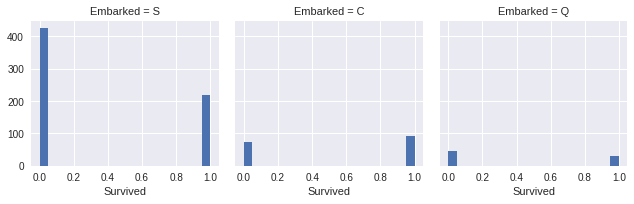

In [351]:
#data visualization of where passengers embarked and correlation check
sns.FacetGrid(train, col='Embarked').map(plt.hist, 'Survived', bins=20)

In [352]:
#correlation check
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


The histograms and correlation chart above show that most of the passengers embarked in Southampton, second most in Chebourg, and third most in Queenstown. However, for classification, the feature should be converted to a numerical one, using the following key: S = 0, C = 1, Q = 2.


In [353]:
#replacing Embarked with numerical values
for dataset in combined:    
    dataset.loc[dataset['Embarked'] == 'S', 'Embarked'] = 0
    dataset.loc[dataset['Embarked'] == 'C', 'Embarked'] = 1
    dataset.loc[dataset['Embarked'] == 'Q', 'Embarked'] = 2

#reestablishing the combined array of both datasets
combined = [train, test]

#data check
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,0,3,1,0,22.0,0.0,0,1.0
1,1,1,1,1,38.0,0.0,1,1.0
2,1,3,1,1,26.0,0.0,0,0.0
3,1,1,1,1,35.0,0.0,0,1.0
4,0,3,1,0,35.0,0.0,0,0.0


###Age Feature

As mentioned above, there are some missing values for the age feature, and bands will also need to be created.

First, to fill the missing values, we should use the medians of a combination of features to determine the age of the passenger (this method was alluded to above but hasn't been used before in this project).

We must first determine which features we want to use. 

*   Pclass, Fare, and Name (Title) have similar implications (Fare also had a missing value in the testing dataset), so just one should be used (Pclass since its correlation is the best)
*   Name (Title) and Sex also have similar implications, so just one should be used (Sex since it has a better correlation)
*   Embarked had some missing values which might be problematic, so we should remove it (the fixed values probably won't have much of an effect, but its safer to stick with the values we know for sure especially since we already have many other features with strong correlations)

In the end, we are left with the Pclass, Sex, and IsAlone features. Pclass values are from 1-3, Sex values are 1 or 0, IsAlone values are 1 or 0.

So, we find median age values for Pclass = 1, Sex = 1, IsAlone = 1; Pclass = 1, Sex = 1, IsAlone = 0; etc.

In [0]:
#arrays have two dimensions, so we create two arrays (one for each of the sexes)
male_ages = np.zeros((2,3))
female_ages = np.zeros((2,3))
ages = [male_ages, female_ages]

In [355]:
#convert the null ages to median ages with certain features
for dataset in combined:
    for s in range(0,2):
        for i in range(0, 2):
          for p in range (0, 3):
            guess = dataset.loc[(dataset['Sex'] == s) & \
                                  (dataset['IsAlone'] == i) & \
                                  (dataset['Pclass'] == p+1),'Age'].dropna()
            age_guess = guess.median()

            # convert guess to nearest 1/2 of an age
            ages[s][i,p] = int(age_guess/0.5 + 0.5 ) * 0.5
            
    for s in range(0,2):
        for i in range(0, 2):
          for p in range (0, 3):
            dataset.loc[(dataset['Sex'] == s) & \
                                  (dataset['IsAlone'] == i) & \
                                  (dataset['Pclass'] == p+1),'Age'] \
                                = ages[s][i,p]

    dataset['Age'] = dataset['Age'].astype(int)

#preview data (must go up to 10 because passenger @ index = 5 is the first who
#has a null age)
train.head(10)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,0,3,1,0,17,0.0,0,1.0
1,1,1,1,1,35,0.0,1,1.0
2,1,3,1,1,22,0.0,0,0.0
3,1,1,1,1,35,0.0,0,1.0
4,0,3,1,0,27,0.0,0,0.0
5,0,3,1,0,27,0.0,2,0.0
6,0,1,1,0,45,0.0,0,0.0
7,0,3,0,0,17,0.0,0,1.0
8,1,3,1,1,19,0.0,0,1.0
9,1,2,1,1,25,0.0,1,1.0


Now that we have replaced the missing values, we can continue with the analysis of the Age feature.

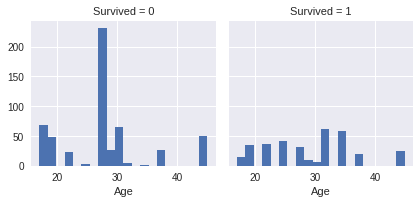

In [356]:
#data visualization of passenger ages
sns.FacetGrid(train, col='Survived').map(plt.hist, 'Age', bins=20)

In [357]:
#correlation check
train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
8,35,0.966667
7,32,0.939394
3,25,0.931818
2,22,0.616667
9,37,0.425532
1,19,0.416667
10,45,0.333333
5,29,0.277778
0,17,0.180723
4,27,0.121212


The histograms and correlation chart displayed above show that the oldest and youngest passengers had the greatest chance of surviving, but there are no strong observations specific to certain ages. 

So, we will create bands (range is 0 to 80 (calculated below)) to replace the Age feature.

Now that we have filled the null values of Age, we can move onto banding. There will be five bands that go from the minimum age (about 0) to the maximum age (80). The mins/maxs are calculated below.

In [358]:
#find min of age
train['Age'].min()

17

In [359]:
#find max of age
train['Age'].max()

45

Age is split into five bands from the min (rounds to 0) to the max (80).

In [360]:
#replace Age with the bands
for dataset in combined:    
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

#correlation check
train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
1,2,0.565934
0,1,0.337094


In [361]:
#reestablishing the combined array of both datasets
combined = [train, test]

#data check
train.head(10)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,0,3,1,0,1,0.0,0,1.0
1,1,1,1,1,2,0.0,1,1.0
2,1,3,1,1,1,0.0,0,0.0
3,1,1,1,1,2,0.0,0,1.0
4,0,3,1,0,1,0.0,0,0.0
5,0,3,1,0,1,0.0,2,0.0
6,0,1,1,0,2,0.0,0,0.0
7,0,3,0,0,1,0.0,0,1.0
8,1,3,1,1,1,0.0,0,1.0
9,1,2,1,1,1,0.0,1,1.0


Thus, a system of five bands is developed to categorize ages. The Age feature is now a number from 0 to 4 instead of specific ages.

##Modeling
Supervised learning will be used to create the models. The seven following algorithms will be used:

*   Logistic Regression
*   Support Vector Machine
*   Naive Bayes
*   Decision Tree
*   Random Forest
*   Perceptron
*   Multilayer Perceptron


In [0]:
#x is features (attributes); y is survived or didn't survive
x_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

###Logistic Regression


In [363]:
#training/testing the model
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(test)

#confidence score for the model
conf_lr = round(lr.score(x_train, y_train) * 100, 2)
conf_lr

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


78.79

###SVM

In [364]:
#training/testing the model
svm = SVC()
svm.fit(train_x, train_y)
pred = svm.predict(test)

#confidence score for the model
conf_svm = round(svm.score(train_x, train_y) * 100, 2)
conf_svm

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


81.14

###Naive Bayes

In [365]:
#training/testing the model
nb = GaussianNB()
nb.fit(train_x, train_y)
pred = nb.predict(test)

#confidence score for the model
conf_nb = round(nb.score(train_x, train_y) * 100, 2)
conf_nb

75.42

###Decision Tree

In [366]:
#training/testing the model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred = dt.predict(test)

#confidence score for the model
conf_dt = round(dt.score(x_train, y_train) * 100, 2)
conf_dt

83.16

###Random Forest

In [373]:
#training/testing the model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(test)

#confidence score for the model
conf_rf = round(rt.score(x_train, y_train) * 100, 2)
conf_rf

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


82.83

###Perceptron

In [368]:
#training/testing the model
pr = Perceptron()
pr.fit(x_train, y_train)
pred = pr.predict(test)

#confidence score for the model
conf_pr = round(pr.score(x_train, y_train) * 100, 2)
conf_pr

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


72.39

###Multilayer Perceptron

In [369]:
#training/testing the model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(x_train, y_train.values.ravel())
pred = mlp.predict(test)

#confidence score for the model
conf_mlp = round(mlp.score(x_train, y_train) * 100, 2)
conf_mlp

81.71

###Comparing the Models

In [374]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 
              'Naive Bayes', 'Decision Tree', 'Random Forest', 
              'Perceptron', 'Multilayer Perceptron'],
    'Score': [conf_lr, conf_svm, conf_nb, conf_dt, conf_rf,
              conf_pr, conf_mlp]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,83.16
4,Random Forest,82.83
6,Multilayer Perceptron,81.71
1,Support Vector Machine,81.14
0,Logistic Regression,78.79
2,Naive Bayes,75.42
5,Perceptron,72.39
